In [1]:
%matplotlib notebook
import pylab
pylab.rcParams['figure.figsize'] = (10., 10.)

from sklearn import linear_model

import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 500
D = 2
x1scale = 0.7
x2scale = 1.5 * 0.7
theta = np.pi/6
rotation = np.array([[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]])
X = np.random.randn(N, D)
X[:, 0] *= x1scale
X[:, 1] *= x2scale
X = np.dot(X, rotation)
w = np.array([2. * 0.7, 2.5 * 0.7])
y = np.dot(X, w)

In [3]:
w1s, w2s = np.meshgrid(np.linspace(-8, 8, 200), np.linspace(-8, 8, 200))
Ws = np.c_[w1s.ravel(), w2s.ravel()]
yhats = np.dot(X, Ws.T)
ress = yhats - y.reshape(N, 1)
losses = np.mean(ress**2, axis=0)
normsl2 = np.sum(Ws**2, axis=1)
normsl1 = np.sum(np.abs(Ws), axis=1)

lambdasridge = np.logspace(1, 5, 8)
lambdaslasso = np.logspace(-1.5, 0.2, 8)
# lambdaslasso = np.r_[np.logspace(-2, 0, 4), np.logspace(1, 1.5, 4)]
wsridge = np.zeros([lambdasridge.shape[0], D])
wslasso = np.zeros([lambdasridge.shape[0], D])
lossesridge = []
losseslasso = []
ridge = linear_model.Ridge(fit_intercept=False, alpha=1.)
lasso = linear_model.Lasso(alpha=1.)
for (i, l) in enumerate(lambdasridge):
    ridge.set_params(alpha=l)
    ridge.fit(X, y)
    wsridge[i, :] = ridge.coef_
    yhat = ridge.predict(X)
    lossesridge.append(np.mean((yhat - y)**2))
    
    lasso.set_params(alpha=lambdaslasso[i])
    lasso.fit(X, y)
    wslasso[i, :] = lasso.coef_
    yhat = lasso.predict(X)
    losseslasso.append(np.mean((yhat - y)**2))
lossesridge = np.r_[lossesridge, np.logspace(np.log10(3), np.log10(10), 5)]
losseslasso = np.r_[losseslasso, np.logspace(np.log10(4), np.log10(10), 5)]
normsridge = np.sum(wsridge**2, axis=1)
normslasso = np.sum(np.abs(wslasso), axis=1)

<IPython.core.display.Javascript object>


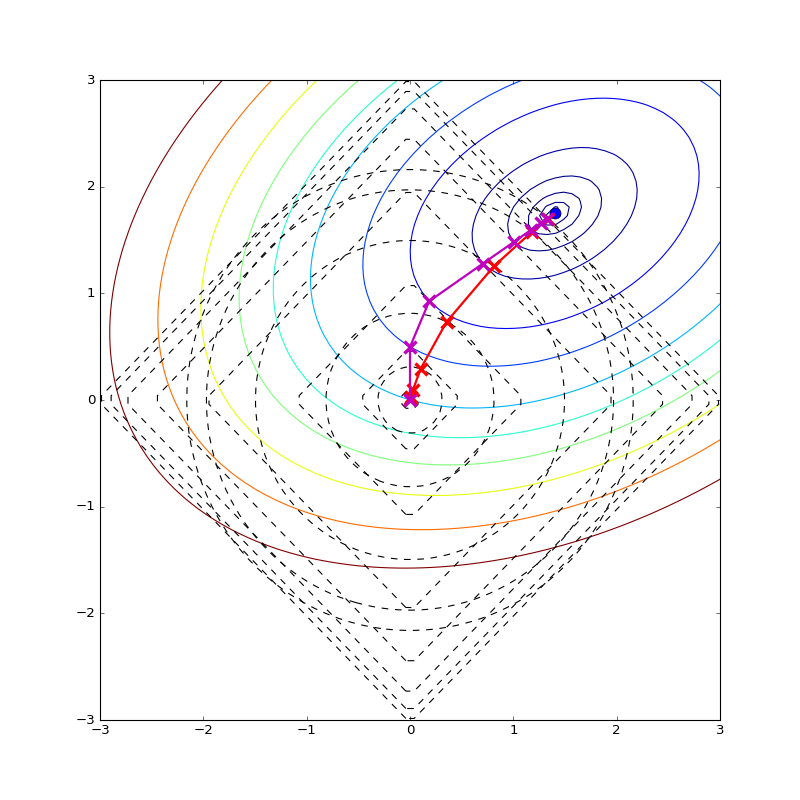

In [4]:
def makeContourPlot(loss_contourlevels, norms, norm_levels, allws, c, nametype='ridge'):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.plot([w[0]], [w[1]], marker='o', markersize=10)
    
    ax.contour(w1s, w2s, losses.reshape(w1s.shape), loss_contourlevels, linewidths=1)
    n = allws.shape[0]
    for i in range(n):
        ax.contour(w1s, w2s, norms.reshape(w1s.shape), norm_levels[:i+1], colors='k', linestyles='--')
        ax.plot(allws[-(i+1):, 0], allws[-(i+1):, 1], marker='x', markersize=10, markeredgewidth=3, c=c, linewidth=2)
        plt.savefig('optimisation_' + nametype + '_' + str(i) + '.png')
    
def makeContourPlot2(norms, norm_levels, lambdas, allws, c, nametype='ridge'):
    n = allws.shape[0]
    for i in range(n):
        fig = plt.figure()
        ax2 = fig.add_subplot(1, 1, 1)
        ax2.set_xlim(-3, 3)
        ax2.set_ylim(-3, 3)
        # The objectives for ridge and lasso are defined slightly differently in terms of lambda and alpha in sklearn
        if nametype=='ridge':
            ax2.contour(w1s, w2s, losses.reshape(w1s.shape) + (lambdas[i]/N) * norms.reshape(w1s.shape), norm_levels, linewidths=1)
        else: # nametype='lasso'
            ax2.contour(w1s, w2s, 0.5 * losses.reshape(w1s.shape) + lambdas[i] * norms.reshape(w1s.shape), norm_levels, linewidths=1)
        ax2.plot([allws[i, 0]], [allws[i, 1]], marker='o', markersize=10, color=c)
        ax2.text(-2.5, -2.5, '$\log(\lambda) = %.2f$' % np.log(lambdas[i]), fontsize=25)
        plt.savefig('contour_levels_' + nametype + '_' + str(i) + '.png')
        #ax.plot([0], [0], ls='', label='$\lambda= %f$' % lambdas[i])
        #ax.legend(fontsize=20, loc='lower left')

plt.contour(w1s, w2s, losses.reshape(w1s.shape), losseslasso, linewidths=1)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.contour(w1s, w2s, normsl2.reshape(w1s.shape), normsridge[::-1], colors='k', linestyles='--')
plt.contour(w1s, w2s, normsl1.reshape(w1s.shape), normslasso[::-1], colors='k', linestyles='--')
plt.plot([w[0]], [w[1]], marker='o', markersize=10)
plt.plot(wsridge[:, 0], wsridge[:, 1], marker='x', markersize=10, markeredgewidth=3, c='r', linewidth=2)
plt.plot(wslasso[:, 0], wslasso[:, 1], marker='x', markersize=10, markeredgewidth=3, c='m', linewidth=2)

<IPython.core.display.Javascript object>


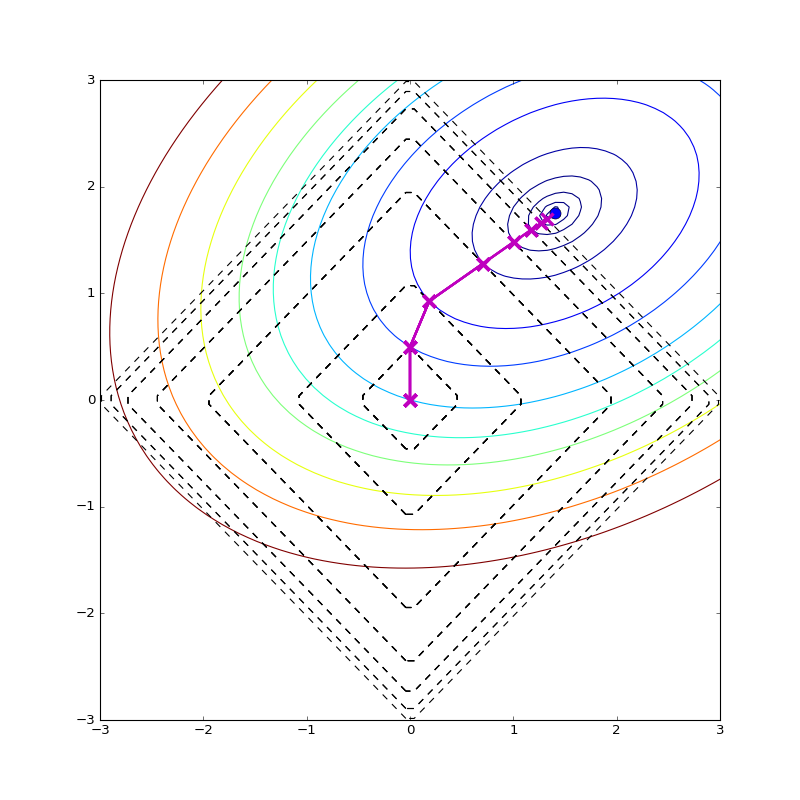

In [5]:
# makeContourPlot(lossesridge, normsl2, normsridge[::-1], wsridge, 'r', nametype='ridge')
makeContourPlot(losseslasso, normsl1, normslasso[::-1], wslasso, 'm', nametype='lasso')

<IPython.core.display.Javascript object>


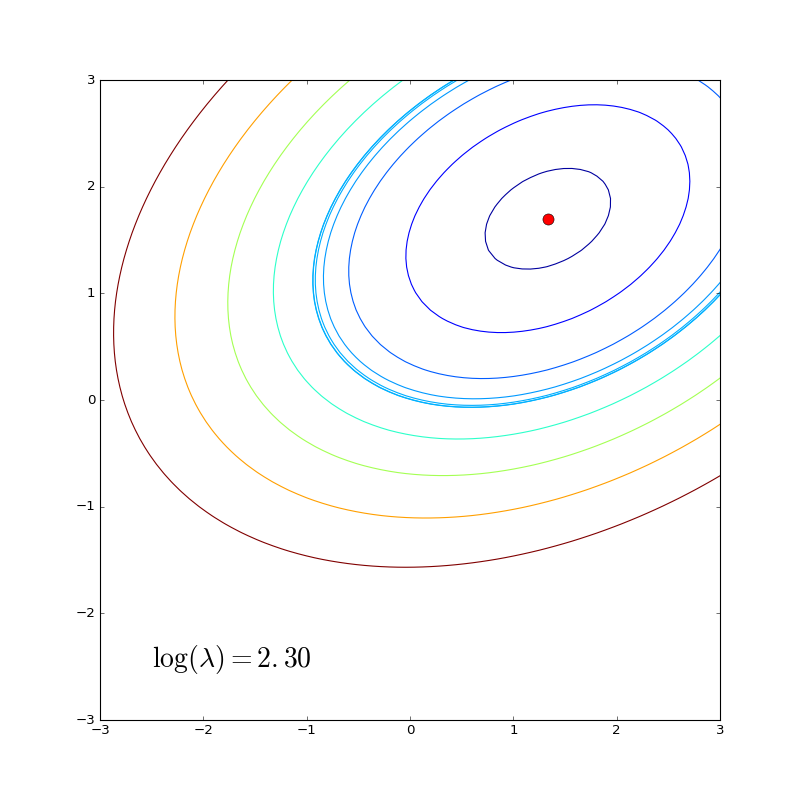

<IPython.core.display.Javascript object>


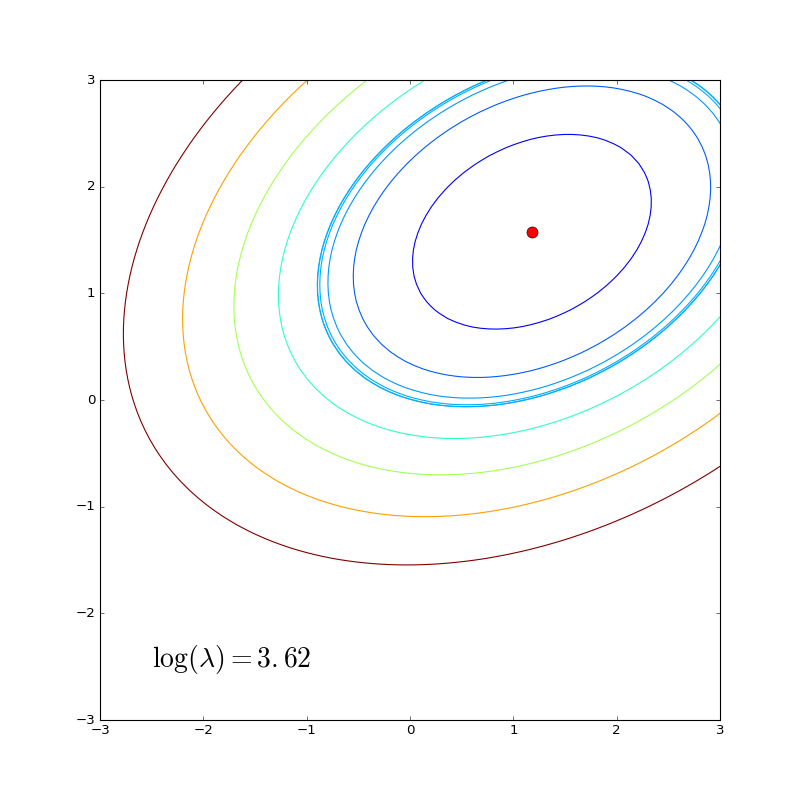

<IPython.core.display.Javascript object>


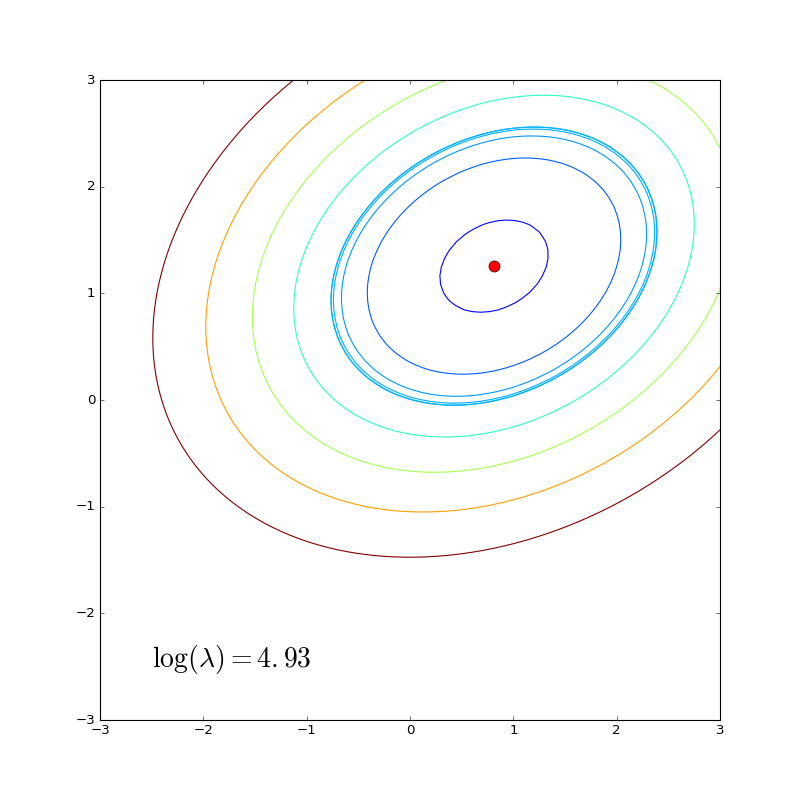

<IPython.core.display.Javascript object>


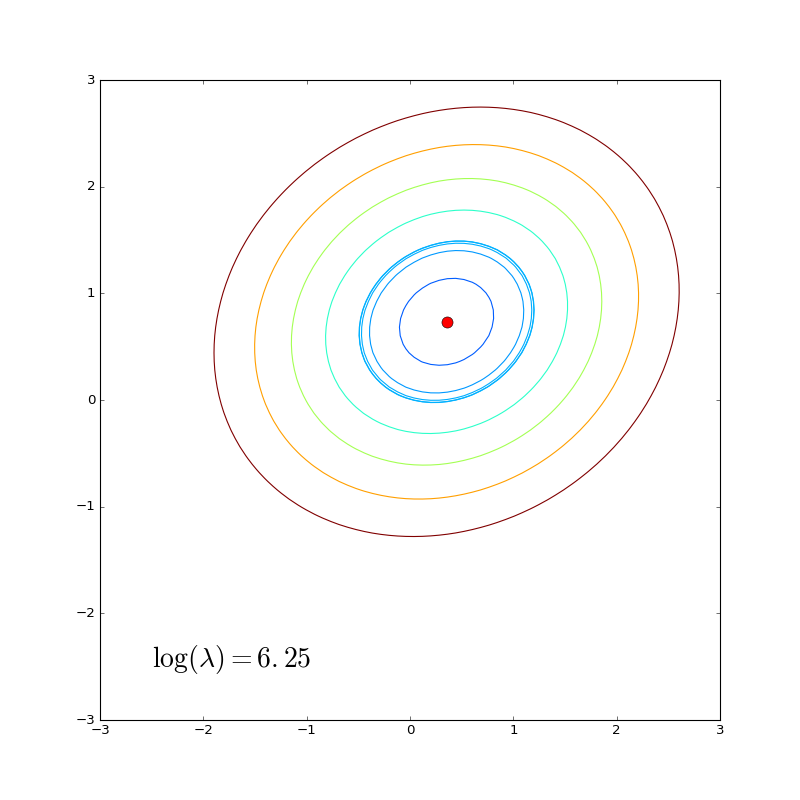

<IPython.core.display.Javascript object>


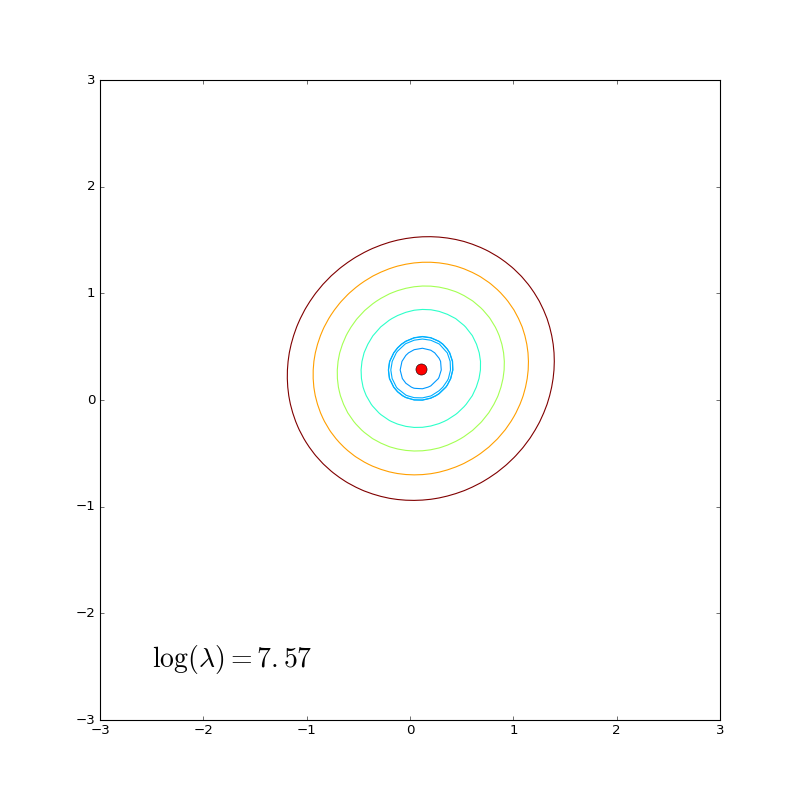

<IPython.core.display.Javascript object>


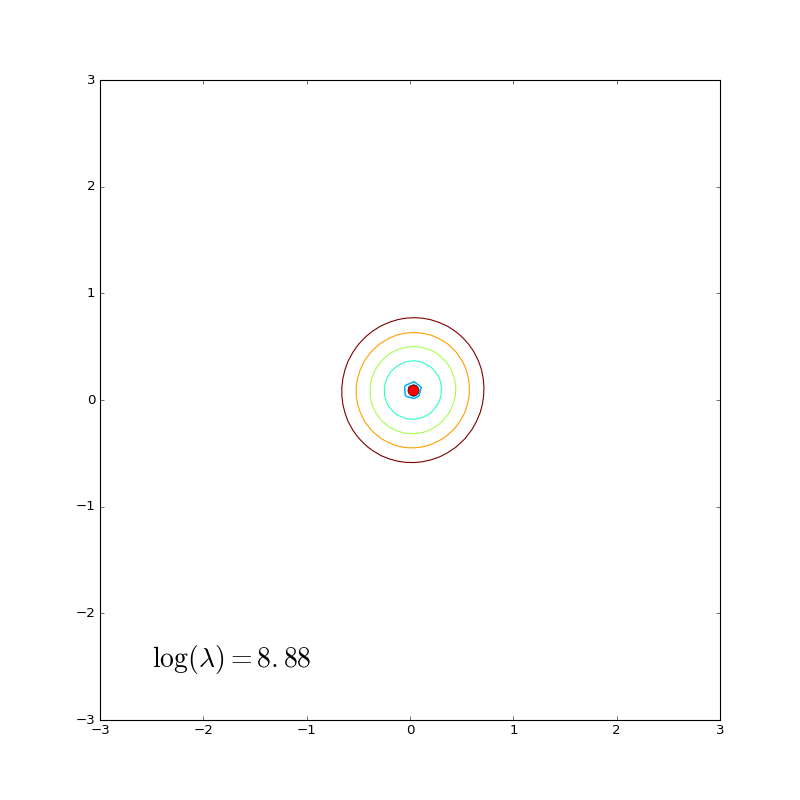

<IPython.core.display.Javascript object>


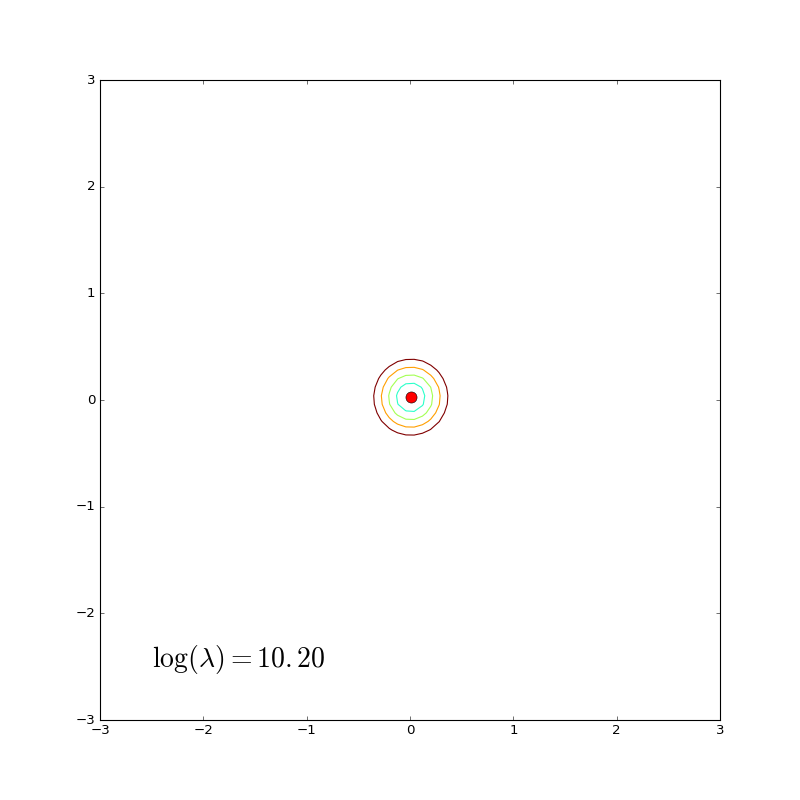

<IPython.core.display.Javascript object>


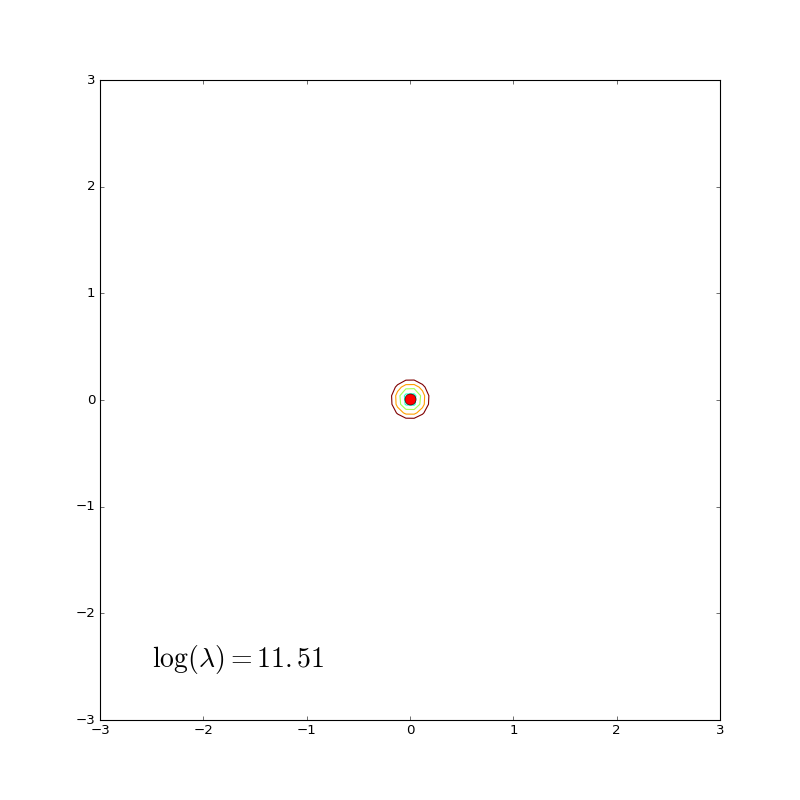

In [6]:
makeContourPlot2(normsl2, lossesridge, lambdasridge, wsridge, 'r', nametype='ridge')
#makeContourPlot2(normsl1, losseslasso, lambdaslasso, wslasso, 'm', nametype='lasso')